In [1]:
import pandapower as pp #import pandapower

net = pp.create_empty_network() #create an empty network

ERROR 1: PROJ: proj_create_from_database: Open of /scistor/ivm/mye500/miniconda3/envs/py310/share/proj failed
/scistor/ivm/mye500/miniconda3/envs/py310/lib/python3.10/site-packages/pandapower/io_utils.py:72: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

In [3]:
net.bus # show bus table

,name,vn_kv,type,zone,in_service
0,HV Busbar,110.0,b,None,True
1,HV Busbar 2,110.0,b,None,True
2,MV Main Bus,20.0,b,None,True
3,MV Bus 1,20.0,b,None,True
4,MV Bus 2,20.0,b,None,True


In [4]:
pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection

net.ext_grid #show external grid table

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,None,0,1.02,50.0,1.0,True


In [5]:
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

In [6]:
net.line # show line table

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Line 1,N2XS(FL)2Y 1x300 RM/35 64/110 kV,0,1,10.0,0.0600,0.144,144.0,0.0,0.588,1.0,1,cs,True
1,Line 2,NA2XS2Y 1x240 RM/25 12/20 kV,2,3,2.0,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True
2,Line 3,48-AL1/8-ST1A 20.0,3,4,3.5,0.5939,0.372,9.5,0.0,0.210,1.0,1,ol,True
3,Line 4,NA2XS2Y 1x240 RM/25 12/20 kV,4,2,2.5,0.1220,0.112,304.0,0.0,0.421,1.0,1,cs,True


In [7]:
sw1 = pp.create_switch(net, 1, 2, et="b", type="CB", closed=True)

In [ ]:
sw3 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net, bus6, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus7, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net, bus7, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus5, line4, et="l", type="LBS", closed=True)

In [8]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, scaling=0.6, name="load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,4,2.0,4.0,0.0,0.0,NaN,0.6,True,wye


In [10]:
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="static generator")

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,static generator,4,2.0,-0.5,NaN,1.0,True,wye,True


In [9]:
pp.create_gen(net, bus6, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator") 

net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type
0,generator,3,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,0.0,None


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


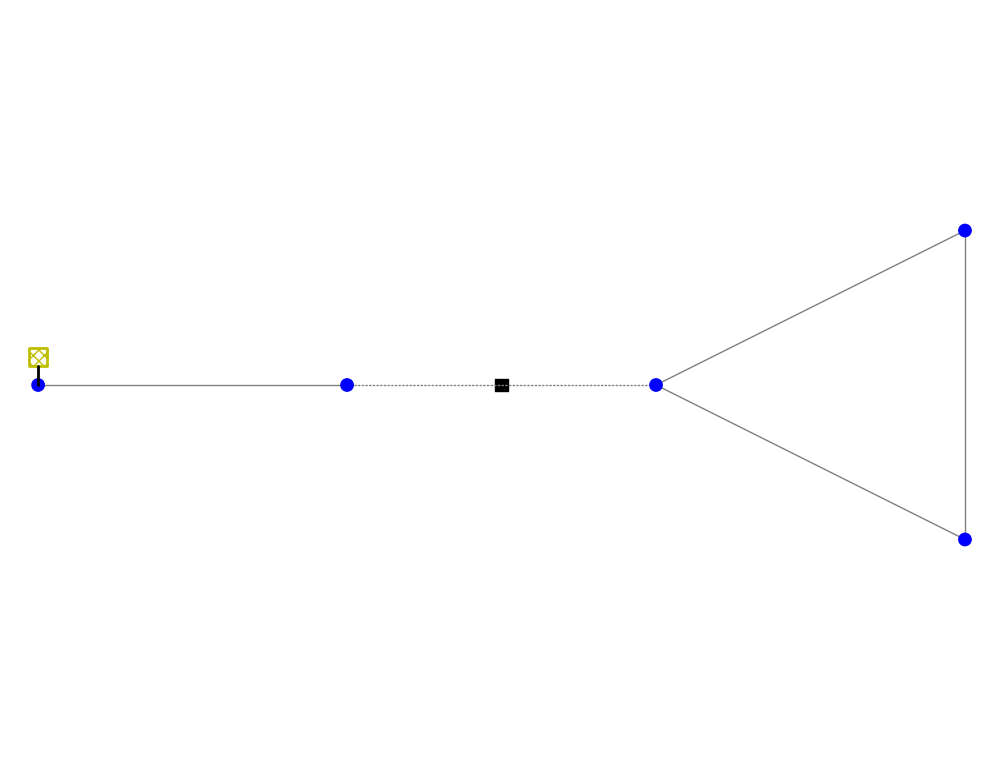

<Axes: >

In [11]:
import pandapower.plotting as plot
%matplotlib inline
plot.simple_plot(net)

In [12]:
pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [13]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,6.456545,74.071150
1,1.028627,-0.150905,0.000000,0.000000
2,1.028627,-0.150905,0.000000,0.000000
3,1.030000,-0.221131,-6.000000,-69.349514
4,1.027756,-0.030705,-0.800000,2.900000


In [14]:
import pandapower as pp #import pandapower

net = pp.create_empty_network() #create an empty network

In [15]:
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=110, type="n")
bus4 = pp.create_bus(net, name="MV Transformer Bus", vn_kv=20, type="n")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

In [16]:
pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection

net.ext_grid #show external grid table

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,None,0,1.02,50.0,1.0,True


In [17]:
trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="25 MVA 110/20 kV")

In [18]:
net.trafo #show transformer table

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,i0_percent,shift_degree,tap_side,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,110kV/20kV transformer,25 MVA 110/20 kV,2,3,25.0,110.0,20.0,12.0,0.41,14.0,0.07,150.0,hv,0,-9,9,1.5,0.0,0,False,1,1.0,True


In [19]:
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

In [20]:
sw1 = pp.create_switch(net, 1, 2, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)

In [21]:
pp.create_load(net, bus7, p_mw=2, q_mvar=4, scaling=0.6, name="load")

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,load,6,2.0,4.0,0.0,0.0,NaN,0.6,True,wye


In [22]:
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="static generator")

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,static generator,6,2.0,-0.5,NaN,1.0,True,wye,True


In [23]:
pp.create_gen(net, bus6, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator") 

net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type
0,generator,5,6.0,1.03,NaN,-3.0,3.0,1.0,False,True,0.0,None


No or insufficient geodata available --> Creating artificial coordinates. This may take some time


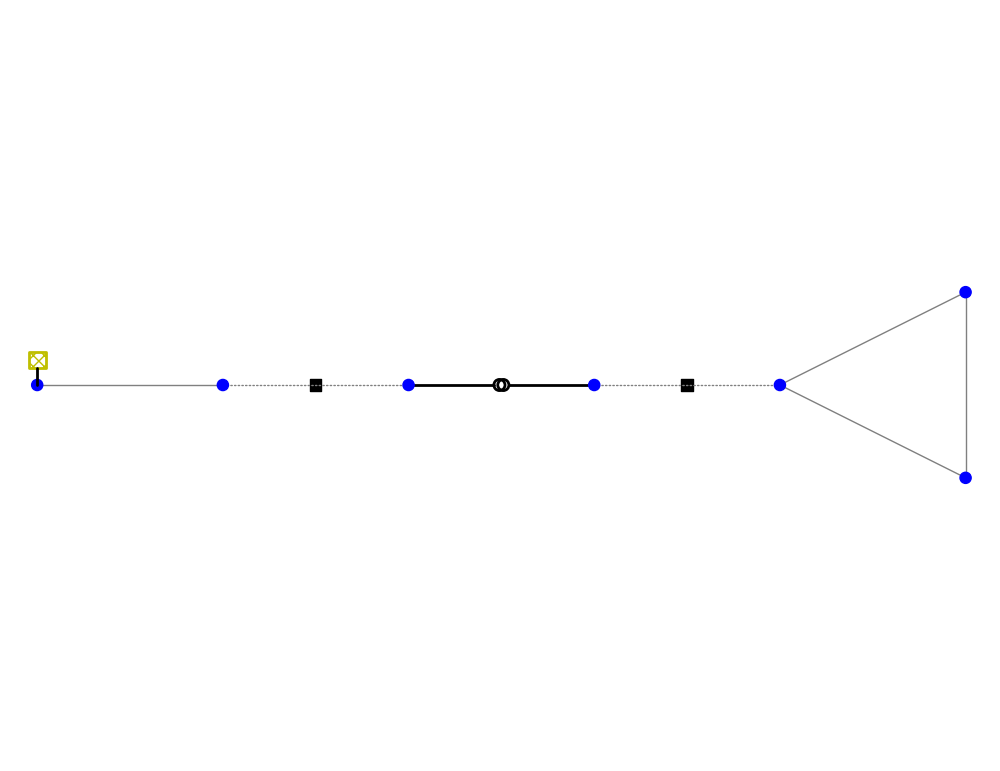

<Axes: >

In [24]:
import pandapower.plotting as plot
%matplotlib inline
plot.simple_plot(net)

In [25]:
pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [27]:
net.bus

,name,vn_kv,type,zone,in_service
0,HV Busbar,110.0,b,None,True
1,HV Busbar 2,110.0,b,None,True
2,HV Transformer Bus,110.0,n,None,True
3,MV Transformer Bus,20.0,n,None,True
4,MV Main Bus,20.0,b,None,True
5,MV Bus 1,20.0,b,None,True
6,MV Bus 2,20.0,b,None,True


In [26]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,6.744741,6.305033
1,1.020731,0.034738,0.000000,0.000000
2,1.020731,0.034738,0.000000,0.000000
3,1.025209,1.803674,0.000000,0.000000
4,1.025209,1.803674,0.000000,0.000000
5,1.030000,1.869476,-6.000000,-3.576800
6,1.024768,1.948448,-0.800000,2.900000
